# Credit Risk Analysis

## Import packages

1. `sys`: System-specific parameters and functions.
2. `reload` (from `imp`): Reload previously imported modules.
3. `matplotlib.pyplot`: Data visualization.
4. `numpy`: Numerical computing.
5. `pandas`: Data manipulation and analysis.
6. `seaborn`: Statistical data visualization.
7. `SimpleImputer` (from `sklearn.impute`): Handling missing data.
8. `LogisticRegression` (from `sklearn.linear_model`): Logistic regression for classification.

In [19]:
import sys

sys.path.append("..")

from imp import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

from helper_functions import config, data_utils, evaluation, plot, preprocessing


import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# from src import config, data_utils, evaluation, plot

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [20]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

## Load normalized data set


In this notebook, we are going to encode a previously normalized `dataset` followed by the creation of the `ML` model.

In [21]:
app_normalized = data_utils.get_normalized_model()
app_normalized['TARGET_LABEL_BAD=1'] = app_normalized.pop('TARGET_LABEL_BAD=1')

In [22]:
app_normalized = preprocessing.categorical_columns(app_normalized)
app_normalized.head()

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,COMPANY,...,PRODUCT,AGE,HAS_DEPENDANTS,HAS_RESIDENCE,MONTHLY_INCOMES_TOT,HAS_CARDS,HAS_BANKING_ACCOUNTS,HAS_PERSONAL_ASSETS,HAS_CARS,TARGET_LABEL_BAD=1
0,1_14,Web,F,other,1,RN,Y,>_12,1,N,...,1,26_35,True,True,[650_1320],True,False,False,False,1
1,15_30,Carga,F,married,0,RJ,Y,0_6,1,Y,...,1,26_35,False,True,[650_1320],False,False,False,False,1
2,1_14,Web,F,married,0,RN,Y,>_12,1,N,...,1,26_35,False,True,[0_650],False,False,False,False,0
3,15_30,Web,F,married,0,PE,N,>_12,1,N,...,1,>_60,False,False,[0_650],False,False,False,False,0
4,1_14,Web,M,married,0,RJ,Y,6_12,1,N,...,1,46_60,False,True,[650_1320],False,False,False,False,1


In [23]:
print(app_normalized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49935 entries, 0 to 49934
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PAYMENT_DAY                  49935 non-null  category
 1   APPLICATION_SUBMISSION_TYPE  49935 non-null  category
 2   SEX                          49935 non-null  category
 3   MARITAL_STATUS               49935 non-null  category
 4   QUANT_DEPENDANTS             49935 non-null  category
 5   RESIDENCIAL_STATE            49935 non-null  category
 6   FLAG_RESIDENCIAL_PHONE       49935 non-null  category
 7   MONTHS_IN_RESIDENCE          49935 non-null  category
 8   FLAG_EMAIL                   49935 non-null  category
 9   COMPANY                      49935 non-null  category
 10  FLAG_PROFESSIONAL_PHONE      49935 non-null  category
 11  PRODUCT                      49935 non-null  category
 12  AGE                          49935 non-null  category
 13  H

### Encoding

- Some of the encoding techniques offered by category_encoders are:
    - `One-Hot Encoding:` Encoding using the One-Hot Encoding method.
    - `Ordinal Encoding:` Ordinal encoding, where ordinal labels are assigned to categories.
    - `Binary Encoding:` Base-2 encoding to reduce dimensionality in categorical variables with multiple categories.
    - `BaseN Encoding:` Base-N encoding to reduce dimensionality in categorical variables with multiple categories.
    - `Target Encoding:` Encoding using the target variable to assign values to categories.
    - `CatBoost Encoding:` Specific encoding for working with the CatBoost algorithm.

In [24]:
reload(preprocessing)
app_dum = preprocessing.encoding(app_normalized, True) # using get_dummies
app_enc = preprocessing.encoding(app_normalized, False) # using encoder

In [25]:
reload(data_utils)
X_train_dum, y_train_dum, X_test_dum, y_test_dum, X_val_dum, y_val_dum = data_utils.get_feature(app_dum)
X_train_enc, y_train_enc, X_test_enc, y_test_enc, X_val_enc, y_val_enc = data_utils.get_feature(app_enc)

In [26]:
# logistic regression
model_lr = LogisticRegression(max_iter=500)

# logistic regression: define the parameter grid to search over
param_grid = {
    'C': [0.01, 0.1, 1, 10]
}

In [27]:
# for dummies as encoder
grid_search_dum = GridSearchCV(model_lr, param_grid, cv=5) # create a grid search object for dummy
grid_search_dum.fit(X_train_dum, y_train_dum) # fit the grid search object to the data (dummy)

# print the best parameters and score
print("Best Parameters dummy: ", grid_search_dum.best_params_)
print("Best Score dummy: ", grid_search_dum.best_score_)

Best Parameters dummy:  {'C': 0.01}
Best Score dummy:  0.7370932116035929


In [30]:
print("model score: %.3f" % grid_search_dum.score(X_val_dum, y_val_dum))
y_hat = grid_search_dum.predict(X_test_dum)

model score: 0.747


Model Performance metrics:
------------------------------
Accuracy: 0.7411635125663363
Precision: 0.7413827655310621
Recall: 0.9994596785087126
F1 Score: 0.8512914916872807

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      7403
           1       0.43      0.00      0.00      2584

    accuracy                           0.74      9987
   macro avg       0.58      0.50      0.43      9987
weighted avg       0.66      0.74      0.63      9987


Prediction Confusion Matrix:
------------------------------
      0  1
0  7399  4
1  2581  3


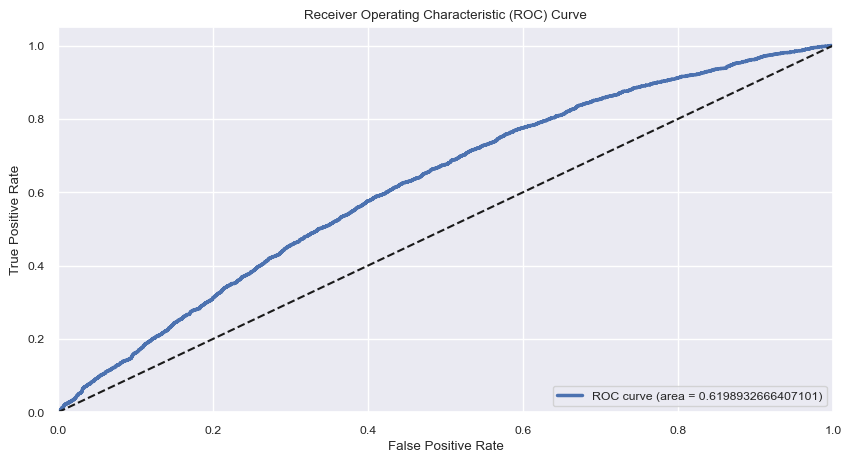

0.6198932666407101

In [31]:
accuracy = evaluation.get_performance(y_hat, y_test_dum)
evaluation.plot_roc(grid_search_dum, y_test_dum, X_test_dum)

In [32]:
grid_search_enc = GridSearchCV(model_lr, param_grid, cv=5) # create a grid search object for encoder
grid_search_enc.fit(X_train_enc, y_train_enc) # fit the grid search object to the data (encoder)

# print the best parameters and score
print("Best Parameters encoder: ", grid_search_enc.best_params_)
print("Best Score: encoder ", grid_search_enc.best_score_)

Best Parameters encoder:  {'C': 0.01}
Best Score: encoder  0.7371226623472242


In [33]:

print("model score: %.3f" % grid_search_enc.score(X_val_enc, y_val_enc))
y_hat = grid_search_enc.predict(X_test_enc)

model score: 0.747


Model Performance metrics:
------------------------------
Accuracy: 0.7412636427355562
Precision: 0.7414570598256338
Recall: 0.9994596785087126
F1 Score: 0.8513404671499252

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      7403
           1       0.50      0.00      0.00      2584

    accuracy                           0.74      9987
   macro avg       0.62      0.50      0.43      9987
weighted avg       0.68      0.74      0.63      9987


Prediction Confusion Matrix:
------------------------------
      0  1
0  7399  4
1  2580  4


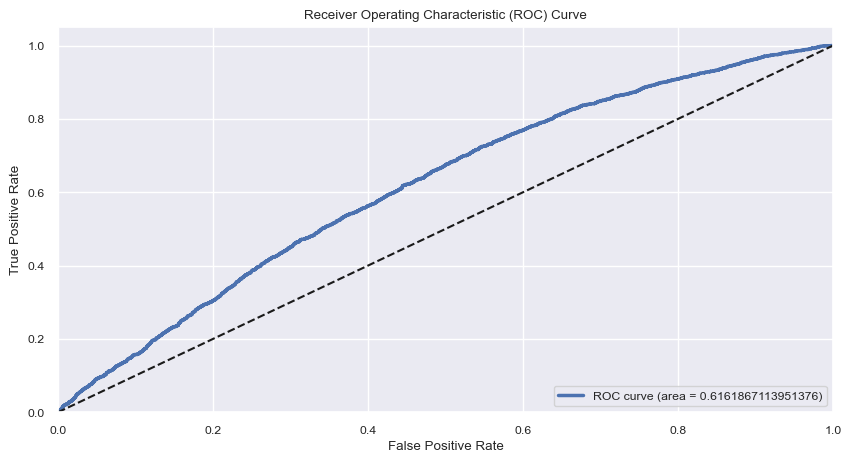

0.6161867113951376

In [34]:
accuracy = evaluation.get_performance(y_hat, y_test_enc)
evaluation.plot_roc(grid_search_enc, y_test_enc, X_test_enc)